<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/18_timeseries_reindexing_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#, parse_dates=["Date"]
df = pd.read_csv("all_stocks_5yr.csv", parse_dates=["date"])
#df.Date = pd.to_datetme[df.Date]
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [2]:
df.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  619040
unique                   1259
top       2018-02-07 00:00:00
freq                      505
first     2013-02-08 00:00:00
last      2018-02-07 00:00:00
Name: date, dtype: object

In [3]:
df2 = df.set_index(["Name", "date"])
df2.sort_index(level=['Name','date'], ascending=[1, 1], inplace=True)
df2.head()

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245

In [4]:
df2.loc["AAL"]

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [5]:
aal = df2.xs("AAL")
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


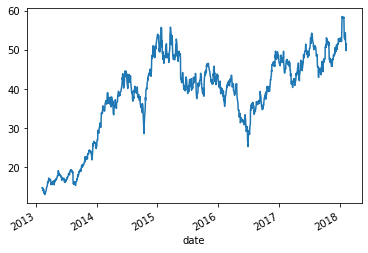

In [6]:
aal.close.plot();

In [7]:
idx = pd.IndexSlice
df_a = df2.loc[idx["A":"AB", :] ,:]
df_a

open    high       low   close    volume
Name date                                                   
A    2013-02-08   45.070   45.35   45.0000   45.08   1824755
     2013-02-11   45.170   45.18   44.4500   44.60   2915405
     2013-02-12   44.810   44.95   44.5000   44.62   2373731
     2013-02-13   44.810   45.24   44.6800   44.75   2052338
     2013-02-14   44.720   44.78   44.3600   44.58   3826245
...                  ...     ...       ...     ...       ...
AAPL 2018-02-01  167.165  168.62  166.7600  167.78  47230787
     2018-02-02  166.000  166.80  160.1000  160.50  86593825
     2018-02-05  159.100  163.88  156.0000  156.49  72738522
     2018-02-06  154.830  163.72  154.0000  163.03  68243838
     2018-02-07  163.085  163.40  159.0685  159.54  51608580

[5036 rows x 5 columns]

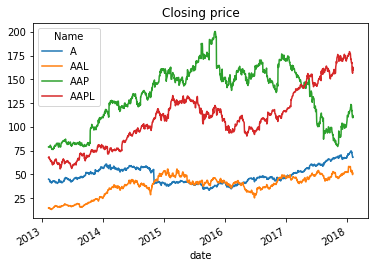

In [8]:
df_a.close.unstack("Name").plot(title="Closing price")

In [9]:
#Slicing datetimes
aal["2017-1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,open,high,low,close,volume
date,,,,,
2017-01-03,47.2800,47.340,46.135,46.30,6737752
2017-01-04,46.6300,47.435,46.350,46.70,5859604
2017-01-05,46.5200,46.930,45.610,45.89,6825316
2017-01-06,45.8500,46.720,45.470,46.21,7260197
2017-01-09,46.0100,47.340,45.780,47.08,4739142
2017-01-10,47.0000,48.510,46.970,48.48,7483764
2017-01-11,49.2900,49.900,48.100,48.64,6925770
2017-01-12,48.6700,49.000,46.840,48.10,5448098
2017-01-13,48.1600,48.430,47.540,47.65,3541980


In [10]:
aal.loc[["2017-01-03"]]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.34,46.135,46.3,6737752


In [11]:
aal.xs("2017-01-03")

open           47.280
high           47.340
low            46.135
close          46.300
volume    6737752.000
Name: 2017-01-03 00:00:00, dtype: float64

In [12]:
aal_2017 = aal.loc["2017"]
aal_2017

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2017-12-22,52.72,52.880,52.420,52.59,2425104
2017-12-26,52.35,53.215,52.330,52.85,2774316
2017-12-27,52.80,52.880,52.060,52.40,2831434


In [13]:
df2.loc[idx[:,"2017-01":"2017-03"],:]

open    high      low  close   volume
Name date                                              
A    2017-01-03  45.93  46.750  45.7400  46.49  1739726
     2017-01-04  46.93  47.380  46.8162  47.10  1821264
     2017-01-05  47.05  47.070  46.3550  46.54  1503763
     2017-01-06  46.63  48.070  46.5600  47.99  2883483
     2017-01-09  48.01  48.555  47.9050  48.14  2575328
...                ...     ...      ...    ...      ...
ZTS  2017-03-27  53.49  54.170  53.4000  53.97  3168491
     2017-03-28  53.81  54.310  53.6900  54.16  2328150
     2017-03-29  54.04  54.270  53.7200  53.82  2269855
     2017-03-30  53.82  53.820  53.2500  53.47  2697544
     2017-03-31  52.98  53.645  52.9800  53.37  3163836

[30999 rows x 5 columns]

In [14]:
df2.to_pickle("stock.pkl")

#Reindexing

In [15]:
#Reindexing


In [16]:
aal = df2.xs("AAL")
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [17]:
start, end = aal.index.min() , aal.index.max()
start, end

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

In [18]:
new_index = pd.date_range(start, end)#, freq="12h" , freq="2D" , , periods=10
new_index

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [19]:
aal2 = aal.reindex(new_index , method="ffill")
aal2

,open,high,low,close,volume
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-09,15.07,15.12,14.63,14.75,8407500
2013-02-10,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
...,...,...,...,...,...
2018-02-03,53.49,53.99,52.03,52.10,5109361
2018-02-04,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284
2018-02-06,49.32,51.50,48.79,51.18,6782480


In [20]:
start , end = df2.index.levels[1].min(), df2.index.levels[1].max()
start, end

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

In [21]:
date_range = pd.date_range(start, end )

In [22]:
df2

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245
...                ...    ...    ...    ...      ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82  2982259
     2018-02-02  77.53  78.12  76.73  76.78  2595187
     2018-02-05  76.64  76.92  73.18  73.83  2962031
     2018-02-06  72.74  74.56  72.13  73.27  4924323
     2018-02-07  72.70  75.00  72.69  73.86  4534912

[619040 rows x 5 columns]

In [23]:
#This doesn't work
df2.reindex(index=date_range, level=1)

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245
...                ...    ...    ...    ...      ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82  2982259
     2018-02-02  77.53  78.12  76.73  76.78  2595187
     2018-02-05  76.64  76.92  73.18  73.83  2962031
     2018-02-06  72.74  74.56  72.13  73.27  4924323
     2018-02-07  72.70  75.00  72.69  73.86  4534912

[619040 rows x 5 columns]

In [24]:
#This doesnt work
#df2.reindex(index=date_range, level=1, method='ffill') #==> TypeError: Fill method not supported if level passed

In [25]:
#Construct both indexes from scratch
new_index = pd.MultiIndex.from_product([df2.index.levels[0], date_range])
df2.reindex(index=new_index)
#We have now weekend values 

open   high    low  close     volume
Name                                                  
A    2013-02-08  45.07  45.35  45.00  45.08  1824755.0
     2013-02-09    NaN    NaN    NaN    NaN        NaN
     2013-02-10    NaN    NaN    NaN    NaN        NaN
     2013-02-11  45.17  45.18  44.45  44.60  2915405.0
     2013-02-12  44.81  44.95  44.50  44.62  2373731.0
...                ...    ...    ...    ...        ...
ZTS  2018-02-03    NaN    NaN    NaN    NaN        NaN
     2018-02-04    NaN    NaN    NaN    NaN        NaN
     2018-02-05  76.64  76.92  73.18  73.83  2962031.0
     2018-02-06  72.74  74.56  72.13  73.27  4924323.0
     2018-02-07  72.70  75.00  72.69  73.86  4534912.0

[922130 rows x 5 columns]

In [26]:
filled = df2.unstack("Name").reindex(date_range , method="ffill", tolerance=pd.Timedelta('2 days'))
#if it's requiring us to forward fill more than two days in time,
# it will instead give us not a number

In [27]:
filled = filled.stack("Name").swaplevel().sort_index()
filled

open   high    low  close     volume
Name                                                  
A    2013-02-08  45.07  45.35  45.00  45.08  1824755.0
     2013-02-09  45.07  45.35  45.00  45.08  1824755.0
     2013-02-10  45.07  45.35  45.00  45.08  1824755.0
     2013-02-11  45.17  45.18  44.45  44.60  2915405.0
     2013-02-12  44.81  44.95  44.50  44.62  2373731.0
...                ...    ...    ...    ...        ...
ZTS  2018-02-03  77.53  78.12  76.73  76.78  2595187.0
     2018-02-04  77.53  78.12  76.73  76.78  2595187.0
     2018-02-05  76.64  76.92  73.18  73.83  2962031.0
     2018-02-06  72.74  74.56  72.13  73.27  4924323.0
     2018-02-07  72.70  75.00  72.69  73.86  4534912.0

[881082 rows x 5 columns]

# Resampling

In [28]:
aal = df2.xs("AAL")


In [29]:
aal.resample(rule="A").mean()# A mean the end of each calendar year

,open,high,low,close,volume
date,,,,,
2013-12-31,18.614336,18.920291,18.308745,18.601549,8.201441e+06
2014-12-31,38.861944,39.549713,38.229872,38.923550,1.239803e+07
2015-12-31,45.184325,45.835482,44.447715,45.121607,1.155447e+07
2016-12-31,38.154365,38.722188,37.607546,38.183829,9.166420e+06
2017-12-31,47.499935,48.063533,46.932376,47.490717,5.871768e+06
2018-12-31,54.221154,55.001877,53.568481,54.280000,5.734882e+06


### Rule val:
Source : 
https://stackoverflow.com/questions/17001389/pandas-resample-documentation

B         business day frequency

C         custom business day frequency (experimental)

D         calendar day frequency

W         weekly frequency

M         month end frequency

SM        semi-month end frequency (15th and end of month)

BM        business month end frequency

CBM       custom business month end frequency

MS        month start frequency

SMS       semi-month start frequency (1st and 15th)

BMS       business month start frequency

CBMS      custom business month start frequency

Q         quarter end frequency

BQ        business quarter endfrequency

QS        quarter start frequency

BQS       business quarter start frequency

A         year end frequency

BA, BY    business year end frequency

AS, YS    year start frequency

BAS, BYS  business year start frequency

BH        business hour frequency

H         hourly frequency

T, min    minutely frequency

S         secondly frequency

L, ms     milliseconds

U, us     microseconds

N         nanoseconds

In [30]:
aal.resample(rule="AS").mean()

,open,high,low,close,volume
date,,,,,
2013-01-01,18.614336,18.920291,18.308745,18.601549,8.201441e+06
2014-01-01,38.861944,39.549713,38.229872,38.923550,1.239803e+07
2015-01-01,45.184325,45.835482,44.447715,45.121607,1.155447e+07
2016-01-01,38.154365,38.722188,37.607546,38.183829,9.166420e+06
2017-01-01,47.499935,48.063533,46.932376,47.490717,5.871768e+06
2018-01-01,54.221154,55.001877,53.568481,54.280000,5.734882e+06


In [31]:
aal.resample(rule="M").mean()

,open,high,low,close,volume
date,,,,,
2013-02-28,14.055714,14.282143,13.567143,13.877143,1.124254e+07
2013-03-31,15.692000,15.983000,15.483500,15.776500,9.358335e+06
2013-04-30,16.095455,16.400000,15.791818,16.108636,6.915250e+06
2013-05-31,17.845455,18.166364,17.590455,17.810909,5.790636e+06
2013-06-30,16.852500,17.103500,16.575500,16.839000,5.202275e+06
...,...,...,...,...,...
2017-10-31,50.883182,51.459918,50.167368,50.756364,5.389377e+06
2017-11-30,47.437143,48.039729,47.043729,47.587143,3.485034e+06
2017-12-31,51.149000,51.728275,50.762245,51.150500,4.000605e+06


In [32]:
aal.resample(rule="MS").mean()

,open,high,low,close,volume
date,,,,,
2013-02-01,14.055714,14.282143,13.567143,13.877143,1.124254e+07
2013-03-01,15.692000,15.983000,15.483500,15.776500,9.358335e+06
2013-04-01,16.095455,16.400000,15.791818,16.108636,6.915250e+06
2013-05-01,17.845455,18.166364,17.590455,17.810909,5.790636e+06
2013-06-01,16.852500,17.103500,16.575500,16.839000,5.202275e+06
...,...,...,...,...,...
2017-10-01,50.883182,51.459918,50.167368,50.756364,5.389377e+06
2017-11-01,47.437143,48.039729,47.043729,47.587143,3.485034e+06
2017-12-01,51.149000,51.728275,50.762245,51.150500,4.000605e+06


In [33]:
aal.resample(pd.Timedelta("4 days")).mean()

,open,high,low,close,volume
date,,,,,
2013-02-08,14.980000,15.065000,14.445000,14.605000,8.644750e+06
2013-02-12,14.405000,14.755000,13.860000,14.355000,1.647335e+07
2013-02-16,14.330000,14.560000,14.080000,14.260000,1.135440e+07
2013-02-20,13.786667,13.936667,13.086667,13.423333,1.090623e+07
2013-02-24,13.340000,13.600000,12.960000,13.230000,7.998633e+06
...,...,...,...,...,...
2018-01-21,56.693333,57.420000,56.126833,57.060000,7.746462e+06
2018-01-25,53.825000,54.225000,52.275000,53.060000,8.644595e+06
2018-01-29,53.080000,53.890000,52.883750,53.367500,5.070374e+06


In [34]:
aal.resample(pd.Timedelta("4 days"), label="right", offset=0).mean()

,open,high,low,close,volume
date,,,,,
2013-02-12,14.980000,15.065000,14.445000,14.605000,8.644750e+06
2013-02-16,14.405000,14.755000,13.860000,14.355000,1.647335e+07
2013-02-20,14.330000,14.560000,14.080000,14.260000,1.135440e+07
2013-02-24,13.786667,13.936667,13.086667,13.423333,1.090623e+07
2013-02-28,13.340000,13.600000,12.960000,13.230000,7.998633e+06
...,...,...,...,...,...
2018-01-25,56.693333,57.420000,56.126833,57.060000,7.746462e+06
2018-01-29,53.825000,54.225000,52.275000,53.060000,8.644595e+06
2018-02-02,53.080000,53.890000,52.883750,53.367500,5.070374e+06


In [35]:
df2.resample("A", level=1).mean()# Doesn't care about the security

,open,high,low,close,volume
date,,,,,
2013-12-31,64.333983,64.913807,63.768605,64.368619,4.573753e+06
2014-12-31,76.965995,77.647126,76.267191,76.969836,4.163922e+06
2015-12-31,84.133849,84.950439,83.275557,84.134718,4.323950e+06
2016-12-31,85.214264,86.057550,84.369887,85.253095,4.556555e+06
2017-12-31,98.777123,99.555482,97.981006,98.800312,3.970423e+06
2018-12-31,111.250128,112.491921,110.048988,111.287631,4.825638e+06


In [36]:
df2.reset_index(level=0).groupby("Name").resample("A").mean()

open       high        low      close        volume
Name date                                                                
A    2013-12-31  47.079690  47.520217  46.694402  47.104823  3.030077e+06
     2014-12-31  54.123056  54.578355  53.637273  54.119802  2.272998e+06
     2015-12-31  39.590833  39.941183  39.234304  39.602143  2.560840e+06
     2016-12-31  43.338492  43.731210  42.970086  43.369960  2.083182e+06
     2017-12-31  59.330558  59.731322  58.922418  59.339641  1.849346e+06
...                    ...        ...        ...        ...           ...
ZTS  2014-12-31  34.028567  34.325801  33.747287  34.063405  4.028968e+06
     2015-12-31  46.127460  46.610730  45.560357  46.101310  3.452446e+06
     2016-12-31  47.825098  48.242964  47.353975  47.833968  3.761415e+06
     2017-12-31  61.065797  61.508155  60.699779  61.129442  2.694186e+06
     2018-12-31  75.771154  76.456069  75.138296  75.800769  2.946851e+06

[2975 rows x 5 columns]

In [37]:
df2.groupby(level="Name").resample("A", level=1).mean()

open       high        low      close        volume
Name date                                                                
A    2013-12-31  47.079690  47.520217  46.694402  47.104823  3.030077e+06
     2014-12-31  54.123056  54.578355  53.637273  54.119802  2.272998e+06
     2015-12-31  39.590833  39.941183  39.234304  39.602143  2.560840e+06
     2016-12-31  43.338492  43.731210  42.970086  43.369960  2.083182e+06
     2017-12-31  59.330558  59.731322  58.922418  59.339641  1.849346e+06
...                    ...        ...        ...        ...           ...
ZTS  2014-12-31  34.028567  34.325801  33.747287  34.063405  4.028968e+06
     2015-12-31  46.127460  46.610730  45.560357  46.101310  3.452446e+06
     2016-12-31  47.825098  48.242964  47.353975  47.833968  3.761415e+06
     2017-12-31  61.065797  61.508155  60.699779  61.129442  2.694186e+06
     2018-12-31  75.771154  76.456069  75.138296  75.800769  2.946851e+06

[2975 rows x 5 columns]

In [38]:
import numpy as np

In [39]:
index = pd.date_range(start="2022-01-01", end="2022-02-01", freq="5min")
data = np.random.normal(size=index.size)
df_hours = pd.DataFrame(data, columns=["Rand"], index=index)
df_hours

,Rand
2022-01-01 00:00:00,-0.147864
2022-01-01 00:05:00,-0.970658
2022-01-01 00:10:00,-0.074671
2022-01-01 00:15:00,-0.397754
2022-01-01 00:20:00,-1.209879
...,...
2022-01-31 23:40:00,-0.496074
2022-01-31 23:45:00,-0.445863
2022-01-31 23:50:00,1.675439
2022-01-31 23:55:00,0.794675


In [40]:
df_hours.resample("1H", offset="0.5H").mean()

,Rand
2021-12-31 23:30:00,-0.049140
2022-01-01 00:30:00,-0.081871
2022-01-01 01:30:00,-0.306074
2022-01-01 02:30:00,0.135680
2022-01-01 03:30:00,-0.210770
...,...
2022-01-31 19:30:00,-0.046795
2022-01-31 20:30:00,0.202239
2022-01-31 21:30:00,0.557492
2022-01-31 22:30:00,-0.101005


In [41]:
df_hours.resample("30min", offset="3min").mean()

,Rand
2021-12-31 23:33:00,-0.147864
2022-01-01 00:03:00,-0.048938
2022-01-01 00:33:00,-0.191274
2022-01-01 01:03:00,0.011456
2022-01-01 01:33:00,-0.072430
...,...
2022-01-31 21:33:00,0.457498
2022-01-31 22:03:00,0.461956
2022-01-31 22:33:00,-0.094233
2022-01-31 23:03:00,-0.069464


In [42]:
aal.close.resample("1M").ohlc()

,open,high,low,close
date,,,,
2013-02-28,14.75,14.75,13.02,13.43
2013-03-31,13.61,17.23,13.61,16.97
2013-04-30,16.67,16.90,15.52,16.90
2013-05-31,16.60,19.12,16.60,17.57
2013-06-30,17.73,17.73,16.13,16.42
...,...,...,...,...
2017-10-31,47.73,53.03,46.82,46.82
2017-11-30,47.84,50.49,45.74,50.49
2017-12-31,49.00,52.85,49.00,52.03


In [43]:
aal.close.resample("1M").apply(lambda x: np.median(x)).to_frame()

,close
date,
2013-02-28,13.780
2013-03-31,16.115
2013-04-30,16.120
2013-05-31,17.795
2013-06-30,16.925
...,...
2017-10-31,51.160
2017-11-30,47.510
2017-12-31,51.180


In [44]:
aal.resample("1M").apply(lambda x: np.median(x))

,open,high,low,close,volume
date,,,,,
2013-02-28,14.050,14.38500,13.30000,13.780,9150500.0
2013-03-31,15.890,16.34500,15.79500,16.115,8472600.0
2013-04-30,16.105,16.44000,15.78000,16.120,5655700.0
2013-05-31,17.780,18.18500,17.61000,17.795,5466650.0
2013-06-30,16.930,17.17000,16.65000,16.925,4272500.0
...,...,...,...,...,...
2017-10-31,51.565,51.88995,50.58005,51.160,4418555.0
2017-11-30,47.510,47.92910,47.18830,47.510,3198779.0
2017-12-31,51.240,51.62500,50.84500,51.180,3041097.5


In [45]:
aal.groupby(pd.Grouper(freq="1M")).agg(MedianClose=("close", "median"),MedianOpen=("open", "median"))

,MedianClose,MedianOpen
date,,
2013-02-28,13.780,14.050
2013-03-31,16.115,15.890
2013-04-30,16.120,16.105
2013-05-31,17.795,17.780
2013-06-30,16.925,16.930
...,...,...
2017-10-31,51.160,51.565
2017-11-30,47.510,47.510
2017-12-31,51.180,51.240


# Rolling function

In [46]:
aal =df2.xs("AAL").copy()

In [47]:
aal["RollingMean"] = aal.close.rolling(window=5).mean()#5 enries in the dataframe

In [48]:
aal

,open,high,low,close,volume,RollingMean
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN
2013-02-13,14.30,14.94,14.25,14.66,10259500,NaN
2013-02-14,14.94,14.96,13.16,13.99,31879900,14.426
...,...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078,53.308
2018-02-02,53.49,53.99,52.03,52.10,5109361,53.114
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530


In [49]:
aal["RollingCenterMean"] = aal.close.rolling(window=5, center=True).mean()
aal

,open,high,low,close,volume,RollingMean,RollingCenterMean
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN,14.426
2013-02-13,14.30,14.94,14.25,14.66,10259500,NaN,14.376
2013-02-14,14.94,14.96,13.16,13.99,31879900,14.426,14.336
...,...,...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078,53.308,52.530
2018-02-02,53.49,53.99,52.03,52.10,5109361,53.114,52.248
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530,51.664


In [50]:
aal_p = aal.loc["2014"].reset_index()

In [51]:
aal_p.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     252
unique                    252
top       2014-01-02 00:00:00
freq                        1
first     2014-01-02 00:00:00
last      2014-12-31 00:00:00
Name: date, dtype: object

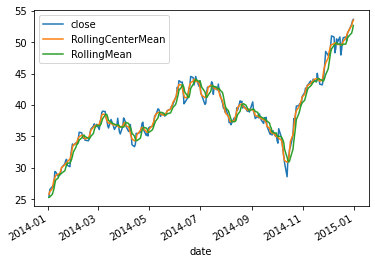

In [52]:
aal_p.plot(x="date", y=["close", "RollingCenterMean", "RollingMean"]);

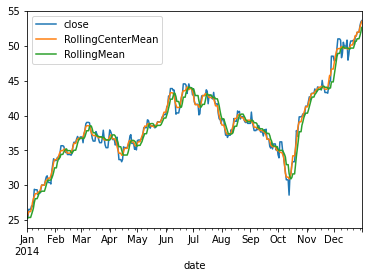

In [53]:
new_index = pd.date_range(aal.index.min(),aal.index.max(), name="date")
aal2 = aal.reindex(new_index, method="ffill")
aal2.loc["2014"].reset_index().plot(x="date", y=["close", "RollingCenterMean", "RollingMean"]);

In [54]:
aal2["Gauss1"] = aal2.close.rolling(window=9, win_type="gaussian", center=True).mean(std=1)
aal2["Gauss2"] = aal2.close.rolling(window=9, win_type="gaussian", center=True).mean(std=2)
aal2["Gauss3"] = aal2.close.rolling(window=9, win_type="gaussian", center=True).mean(std=3)
aal2

,open,high,low,close,volume,RollingMean,RollingCenterMean,Gauss1,Gauss2,Gauss3
date,,,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN,NaN,NaN,NaN,NaN
2013-02-09,15.07,15.12,14.63,14.75,8407500,NaN,NaN,NaN,NaN,NaN
2013-02-10,15.07,15.12,14.63,14.75,8407500,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN,NaN,NaN,NaN,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN,14.426,14.424383,14.465945,14.489237
...,...,...,...,...,...,...,...,...,...,...
2018-02-03,53.49,53.99,52.03,52.10,5109361,53.114,52.248,52.075498,52.111019,52.138866
2018-02-04,53.49,53.99,52.03,52.10,5109361,53.114,52.248,NaN,NaN,NaN
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530,51.664,NaN,NaN,NaN


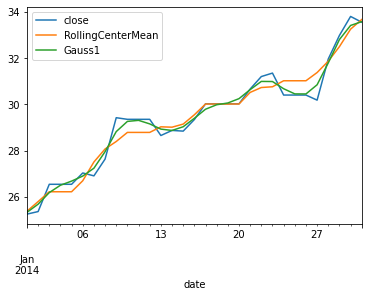

In [55]:
aal2.loc["2014-1"].reset_index().plot(x="date", y=["close", "RollingCenterMean", "Gauss1" ]);

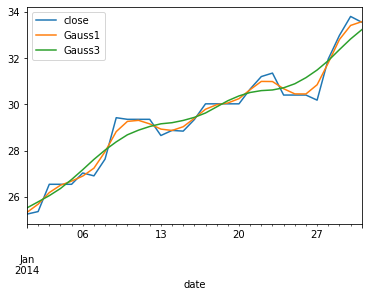

In [56]:
aal2.loc["2014-1"].reset_index().plot(x="date", y=["close", "Gauss1", "Gauss3" ]);

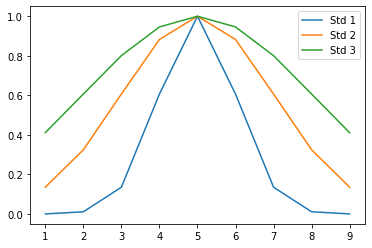

In [57]:
# STD
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt
x_values = np.arange(1,10 )
plt.plot(x_values, gaussian(9, std=1), label="Std 1")
plt.plot(x_values, gaussian(9, std=2), label="Std 2")
plt.plot(x_values, gaussian(9, std=3), label="Std 3")
plt.legend();


#TimeZones

In [58]:
df = pd.read_csv("data_elonmusk.csv", encoding="latin1", parse_dates=["Time"])
df.drop(df.columns[0], inplace=True, axis=1)
df.head()

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


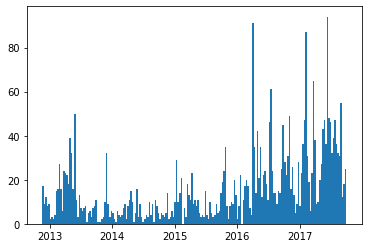

In [59]:
df.Time.hist(bins=200, grid=False)  ;

In [60]:
df = df.rename(columns={"Time": "DateTime"})
df.head()

,Tweet,DateTime,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


In [61]:
df["Time"] = df.DateTime.dt.timetz# dt to acces the datetime property
df.DateTime.dt.time


0       17:39:19
1       10:44:54
2       10:39:57
3       09:56:12
4       09:19:21
          ...   
3213    08:52:03
3214    08:38:31
3215    08:30:44
3216    08:59:46
3217    17:59:47
Name: DateTime, Length: 3218, dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tweet         3218 non-null   object        
 1   DateTime      3218 non-null   datetime64[ns]
 2   Retweet from  525 non-null    object        
 3   User          3218 non-null   object        
 4   Time          3218 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 125.8+ KB


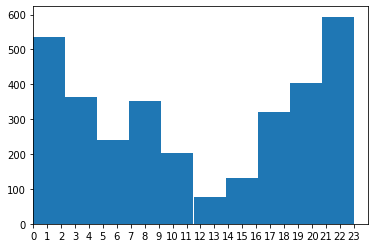

In [63]:
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]

    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list)
    plt.show()
chart(df.Time)

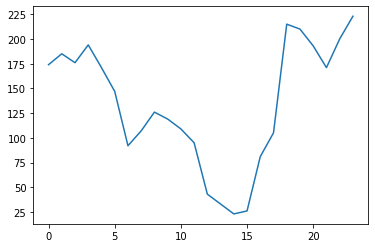

In [64]:
df.DateTime.dt.hour.value_counts().sort_index().plot();

In [65]:
df.DateTime = df.DateTime.dt.tz_localize("Europe/IStanbul")
df

,Tweet,DateTime,Retweet from,User,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19+03:00,NaN,elonmusk,17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54+03:00,SpaceX,elonmusk,10:44:54
2,@bigajm Yup :),2017-09-29 10:39:57+03:00,NaN,elonmusk,10:39:57
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12+03:00,NaN,elonmusk,09:56:12
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21+03:00,NaN,elonmusk,09:19:21
...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03+02:00,NaN,elonmusk,08:52:03
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31+02:00,NaN,elonmusk,08:38:31
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44+02:00,NaN,elonmusk,08:30:44
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46+02:00,NaN,elonmusk,08:59:46


In [66]:
#Doesnt work
#df.DateTime.dt.tz_convert(None).tz_localize("America/Los_Angeles")

In [67]:
df["LATime"] = df.DateTime.dt.tz_convert("America/Los_Angeles")
df

,Tweet,DateTime,Retweet from,User,Time,LATime
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19+03:00,NaN,elonmusk,17:39:19,2017-09-29 07:39:19-07:00
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54+03:00,SpaceX,elonmusk,10:44:54,2017-09-29 00:44:54-07:00
2,@bigajm Yup :),2017-09-29 10:39:57+03:00,NaN,elonmusk,10:39:57,2017-09-29 00:39:57-07:00
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12+03:00,NaN,elonmusk,09:56:12,2017-09-28 23:56:12-07:00
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21+03:00,NaN,elonmusk,09:19:21,2017-09-28 23:19:21-07:00
...,...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03+02:00,NaN,elonmusk,08:52:03,2012-11-19 22:52:03-08:00
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31+02:00,NaN,elonmusk,08:38:31,2012-11-19 22:38:31-08:00
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44+02:00,NaN,elonmusk,08:30:44,2012-11-19 22:30:44-08:00
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46+02:00,NaN,elonmusk,08:59:46,2012-11-18 22:59:46-08:00


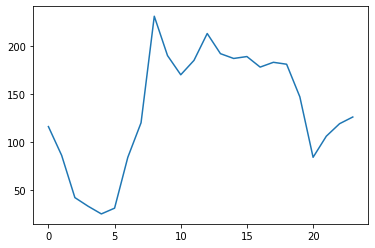

In [68]:
df.LATime.dt.hour.value_counts().sort_index().plot();

In [71]:
!pip install pytz 
import pytz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
for t in pytz.all_timezones[:10]:
  print(t)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau


In [75]:
df["ParisTime"] = df.DateTime.dt.tz_convert("Europe/Paris")
df

,Tweet,DateTime,Retweet from,User,Time,LATime,ParisTime
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19+03:00,NaN,elonmusk,17:39:19,2017-09-29 07:39:19-07:00,2017-09-29 16:39:19+02:00
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54+03:00,SpaceX,elonmusk,10:44:54,2017-09-29 00:44:54-07:00,2017-09-29 09:44:54+02:00
2,@bigajm Yup :),2017-09-29 10:39:57+03:00,NaN,elonmusk,10:39:57,2017-09-29 00:39:57-07:00,2017-09-29 09:39:57+02:00
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12+03:00,NaN,elonmusk,09:56:12,2017-09-28 23:56:12-07:00,2017-09-29 08:56:12+02:00
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21+03:00,NaN,elonmusk,09:19:21,2017-09-28 23:19:21-07:00,2017-09-29 08:19:21+02:00
...,...,...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03+02:00,NaN,elonmusk,08:52:03,2012-11-19 22:52:03-08:00,2012-11-20 07:52:03+01:00
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31+02:00,NaN,elonmusk,08:38:31,2012-11-19 22:38:31-08:00,2012-11-20 07:38:31+01:00
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44+02:00,NaN,elonmusk,08:30:44,2012-11-19 22:30:44-08:00,2012-11-20 07:30:44+01:00
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46+02:00,NaN,elonmusk,08:59:46,2012-11-18 22:59:46-08:00,2012-11-19 07:59:46+01:00


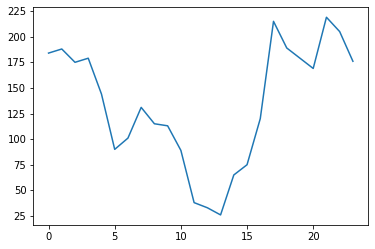

In [78]:
df.ParisTime.dt.hour.value_counts().sort_index().plot();